# Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys    
import os
path_to_module = '/content/drive/MyDrive/'
sys.path.append(path_to_module)
os.chdir(path_to_module)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('./creditcard.csv')

In [3]:
print("The shape of the original matrix is ({}, {})".format(data.shape[0],data.shape[1]))
data.head()

The shape of the original matrix is (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Distribution of Fraudulent and Non-Fraudulent Data**

Total Samples:  284807
Not-Fraud: 284315, Fraud: 492


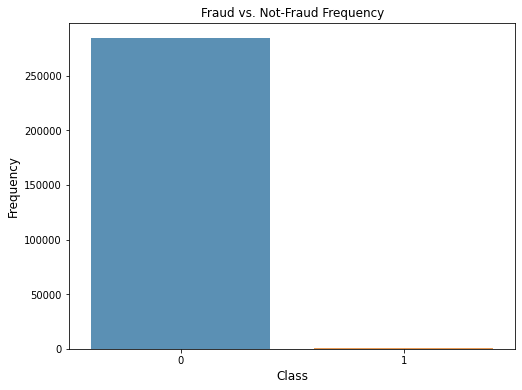

In [4]:
fraud=data[data["Class"]==1]
genuine=data[data["Class"]==0]
print("Total Samples: ", data.shape[0])
print("Not-Fraud: "+str(len(genuine))+", Fraud: "+str(len(fraud)))

plt.figure(figsize=(8,6))
histogram_rootlabel=sns.barplot(x=data['Class'].value_counts().index, y=data['Class'].value_counts().values, alpha=0.8)
plt.title('Fraud vs. Not-Fraud Frequency')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

Class 0 = Not Fraud, Class 1 = Fraud

**Distribution of Transactions Over Time**

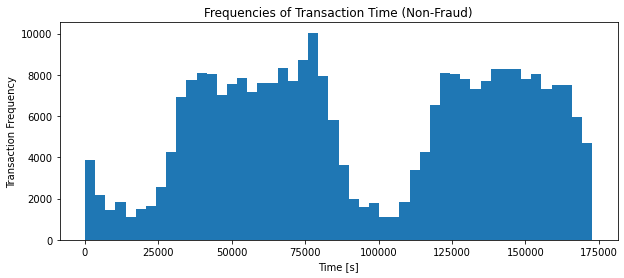

In [5]:
plt.figure(figsize=(10,4))
plt.title("Frequencies of Transaction Time (Non-Fraud)")
plt.xlabel("Time [s]")
plt.ylabel("Transaction Frequency")
plt.hist(genuine["Time"], bins=50)
plt.show()

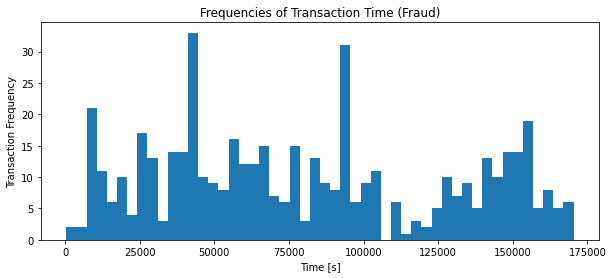

In [6]:
plt.figure(figsize=(10,4))
plt.title("Frequencies of Transaction Time (Fraud)")
plt.xlabel("Time [s]")
plt.ylabel("Transaction Frequency")
plt.hist(fraud["Time"], bins=50)
plt.show()

**Distribution of Transaction Over Amounts**

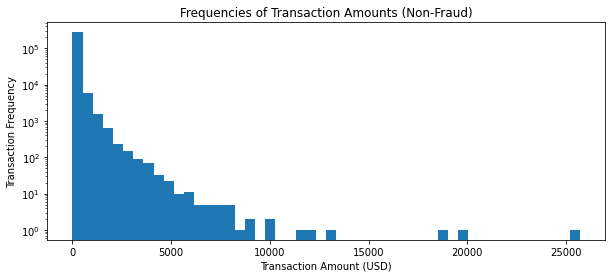

In [7]:
plt.figure(figsize=(10,4))
plt.title("Frequencies of Transaction Amounts (Non-Fraud)")
plt.xlabel("Transaction Amount (USD)")
plt.ylabel("Transaction Frequency")
plt.yscale('log')
plt.hist(genuine["Amount"], bins=50)
plt.show()

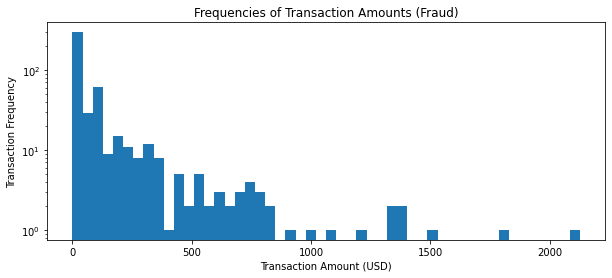

In [8]:
plt.figure(figsize=(10,4))
plt.title("Frequencies of Transaction Amounts (Fraud)")
plt.xlabel("Transaction Amount (USD)")
plt.ylabel("Transaction Frequency")
plt.yscale('log')
plt.hist(fraud["Amount"], bins=50)
plt.show()

**Correlation Heatmap**

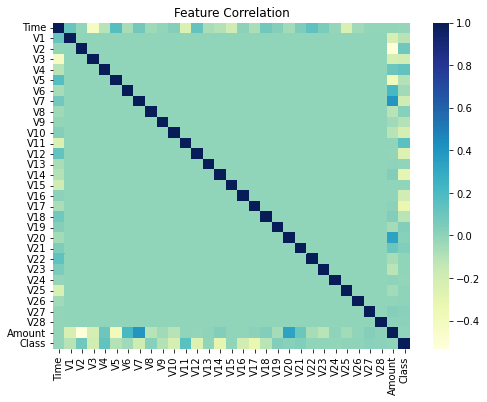

In [9]:
import seaborn as sb
corr = data.corr()
plt.figure(figsize=(8,6))
dataplot = sb.heatmap(corr, cmap="YlGnBu")
plt.title("Feature Correlation")
plt.show()

From above heatmap, "Time" and "Amount" seems to have a correlation with "Class" but they do not appear salient.

# Data Pre-processing

**Scaling**
Here, "Amount" (Credit Card Transaction Amount) is scaled using standard scaler.

In [10]:
# Scale Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([("Scaled Amount", StandardScaler(), ["Amount"])])
ct.fit_transform(data)
ct = ColumnTransformer([("Scaled Amount", StandardScaler(), ["Amount"])], remainder="passthrough")
scaled_data=ct.fit_transform(data)

#scaled_data: 1st column=scaled amount, 2nd~2nd last=time, V1-V28, last column=class

**Splitting to Train and Test Dataset** Dataset is split with a test size of 30%.

In [11]:
#Splitting Data to Train & Test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(scaled_data, random_state=42, test_size=0.3)
print("The shape of the training matrix is ({}, {})".format(train_data.shape[0],train_data.shape[1]))
print("The shape of the test matrix is ({}, {})".format(test_data.shape[0],test_data.shape[1]))

The shape of the training matrix is (199364, 31)
The shape of the test matrix is (85443, 31)


In [12]:
#split train_data and test_data to input features and target values
train_input, test_input = train_data[:,0:30], test_data[:,0:30]
train_target, test_target = train_data[:,-1], test_data[:,-1]

#convert train_data from array to dataframe for later use
column_values = ['Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
column_values_w_class = ['Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']
train_data_df=pd.DataFrame(data=train_data, columns=column_values_w_class)
test_data_df=pd.DataFrame(data=test_data, columns=column_values_w_class)

# Synthetic Data Generation: Resampling Methods

Since the number of fraudulent cases are much smaller than that of non-fraudulent, synthetic data is created for the training set.

**Over-Sampling Methods** Class imbalance is resolved by over-sampling the minority class (in this case, fraud data.) The over-sampling methods used here are: 1.SMOTE, 2.SVM SMOTE, 3.Borderline SMOTE, 4.ADASYN, 5.RandomOverSampler

In [13]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
train_input_smote, train_target_smote = sm.fit_resample(train_input, train_target)
print(train_input_smote.shape, train_input.shape)

(398016, 30) (199364, 30)


In [14]:
# SVM SMOTE
from imblearn.over_sampling import SVMSMOTE
svmsm = SVMSMOTE(random_state=42)
train_input_svmsm, train_target_svmsm = svmsm.fit_resample(train_input, train_target)
print(train_input_svmsm.shape, train_input.shape)

(398016, 30) (199364, 30)


In [15]:
# Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
bsm = BorderlineSMOTE(random_state=42)
train_input_bsm, train_target_bsm = bsm.fit_resample(train_input, train_target)
print(train_input_bsm.shape, train_input.shape)

(398016, 30) (199364, 30)


In [16]:
# ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
train_input_adasyn, train_target_adasyn = adasyn.fit_resample(train_input, train_target)
print(train_input_adasyn.shape, train_input.shape)

(397943, 30) (199364, 30)


In [17]:
# RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
train_input_ros, train_target_ros = ros.fit_resample(train_input, train_target)
print(train_input_ros.shape, train_input.shape)

(398016, 30) (199364, 30)


**Under-Sampling Methods** Here, data points from the majority class (non-fraud) are removed by the following udner-sampling methods: 1.Random Under Sampler, 2.Near Miss.

In [18]:
# RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
train_input_rus, train_target_rus = rus.fit_resample(train_input, train_target)
print(train_input_rus.shape, train_input.shape)

(712, 30) (199364, 30)


In [19]:
# NearMiss
from imblearn.under_sampling import NearMiss
nm = NearMiss()
train_input_nm, train_target_nm = nm.fit_resample(train_input, train_target)
print(train_input_nm.shape, train_input.shape)

(712, 30) (199364, 30)


**Correlation Heatmap (Before and After Re-Sampling)**

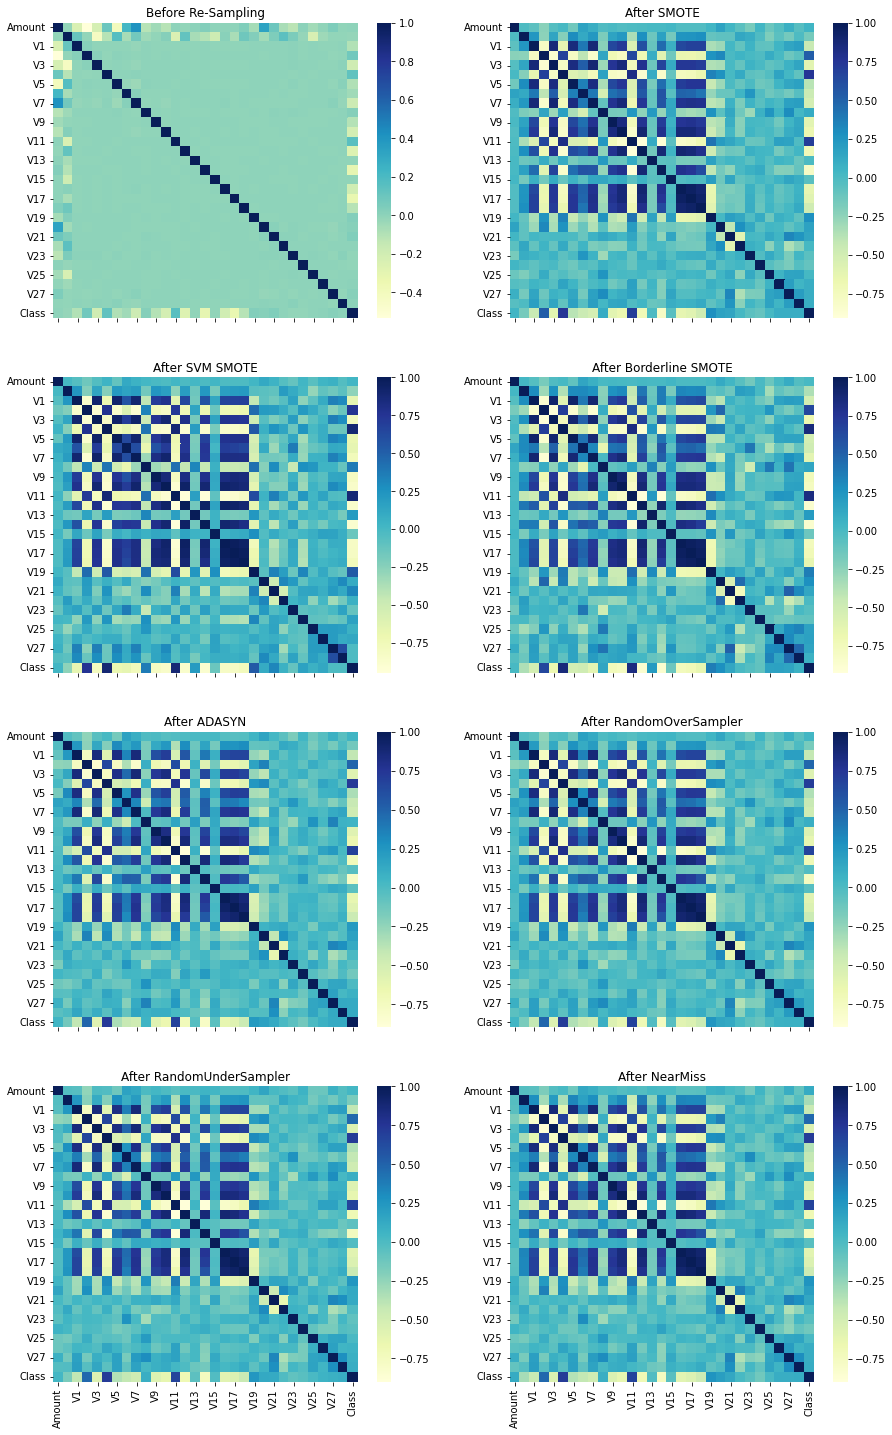

In [108]:
# Re-plotting Correlation
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(15,25))

#Before Re-sampling
imbalancedf=pd.DataFrame(data=train_data, columns=column_values_w_class)
dataplot = sb.heatmap(imbalancedf.corr(), cmap="YlGnBu", ax=axes[0,0])
axes[0,0].set_title('Before Re-Sampling')

# After SMOTE
smotedf=pd.DataFrame(data=train_input_smote, columns=column_values)
smotedf["Class"] = train_target_smote
dataplot = sb.heatmap(smotedf.corr(), cmap="YlGnBu", ax=axes[0,1])
axes[0,1].set_title('After SMOTE')

# After SVM SMOTE
svmdf=pd.DataFrame(data=train_input_svmsm, columns=column_values)
svmdf["Class"] = train_target_svmsm
dataplot = sb.heatmap(svmdf.corr(), cmap="YlGnBu", ax=axes[1,0])
axes[1,0].set_title('After SVM SMOTE')

# Borderline SMOTE
bsmdf=pd.DataFrame(data=train_input_bsm, columns=column_values)
bsmdf["Class"] = train_target_bsm
dataplot = sb.heatmap(bsmdf.corr(), cmap="YlGnBu", ax=axes[1,1])
axes[1,1].set_title('After Borderline SMOTE')

# ADASYN
adasyndf=pd.DataFrame(data=train_input_adasyn, columns=column_values)
adasyndf["Class"] = train_target_adasyn
dataplot = sb.heatmap(adasyndf.corr(), cmap="YlGnBu", ax=axes[2,0])
axes[2,0].set_title('After ADASYN')

# After RandomOverSampler
rosdf=pd.DataFrame(data=train_input_ros, columns=column_values)
rosdf["Class"] = train_target_ros
dataplot = sb.heatmap(rosdf.corr(), cmap="YlGnBu", ax=axes[2,1])
axes[2,1].set_title('After RandomOverSampler')

# After RandomUnderSampler
rusdf=pd.DataFrame(data=train_input_rus, columns=column_values)
rusdf["Class"] = train_target_rus
dataplot = sb.heatmap(rusdf.corr(), cmap="YlGnBu", ax=axes[3,0])
axes[3,0].set_title('After RandomUnderSampler')

# After NearMiss
nmdf=pd.DataFrame(data=train_input_nm, columns=column_values)
nmdf["Class"] = train_target_nm
dataplot = sb.heatmap(nmdf.corr(), cmap="YlGnBu", ax=axes[3,1])
axes[3,1].set_title('After NearMiss')

plt.show()

After resolving class imbalance in the dataset, feature correlations are now evidently easier to observe with V1-V18 showing the strongest saliency.

# Synthetic Data Generation: GANs

Here, synthetic fraudulent data is generated using GANs (Generative Adversarial Network.) The following methods are adopted: 1.Vanilla GAN, 2.WGAN, 3.CramerGAN. This process was adapted from ydata tutorial: https://github.com/ydataai/ydata-synthetic/blob/dev/examples/regular/gan_example.ipynb

In [21]:
# ! pip install ydata-synthetic
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import VanilllaGAN, WGAN, CRAMERGAN
import sklearn.cluster as cluster

In [76]:
#Number of samples to generate for each architecture
n_samples = 40000

**Vanilla GAN**

In [77]:
#Vanilla GAN--Create synthetic data using fraud data from train_data
model = VanilllaGAN

#Convert train_data to dataframe and assign train_data_fraud to all the data with Class=1
train_data_fraud = train_data_df.loc[train_data_df['Class']==1].copy()

#Assigning KMeans clustering labels to fraudulent train data
algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train_data_fraud[column_values])
train_data_fraud_w_classes = train_data_fraud.copy()
train_data_fraud_w_classes['Class'] = labels
train_data_fraud_w_classes['Class'].value_counts()

0    193
1    163
Name: Class, dtype: int64

In [ ]:
# GAN Training
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 200+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

synthesizer = model(gan_args)
synthesizer.train(data = train_data_fraud_w_classes, train_arguments = train_args, num_cols = column_values, cat_cols = ["Class"])

In [79]:
synthesizer.generator.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(128, 32)]               0         
_________________________________________________________________
dense_56 (Dense)             (128, 128)                4224      
_________________________________________________________________
dense_57 (Dense)             (128, 256)                33024     
_________________________________________________________________
dense_58 (Dense)             (128, 512)                131584    
_________________________________________________________________
dense_59 (Dense)             (128, 32)                 16416     
_________________________________________________________________
gumbel_softmax_activation_7  (128, 32)                 0         
Total params: 185,248
Trainable params: 185,248
Non-trainable params: 0
____________________________________________________

In [80]:
synthesizer.discriminator.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(128, 32)]               0         
_________________________________________________________________
dense_60 (Dense)             (128, 512)                16896     
_________________________________________________________________
dropout_14 (Dropout)         (128, 512)                0         
_________________________________________________________________
dense_61 (Dense)             (128, 256)                131328    
_________________________________________________________________
dropout_15 (Dropout)         (128, 256)                0         
_________________________________________________________________
dense_62 (Dense)             (128, 128)                32896     
_________________________________________________________________
dense_63 (Dense)             (128, 1)                  129

In [81]:
#Generate Sample Data
gan_data = synthesizer.sample(n_samples)
gan_data["Class"].value_counts()

Synthetic data generation: 100%|██████████| 313/313 [00:01<00:00, 191.61it/s]


1    21144
0    18920
Name: Class, dtype: int64

**WGAN**

In [ ]:
# wGAN Training
model = WGAN
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 200+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

synthesizer = model(gan_args, n_critic=2)
synthesizer.train(data = train_data_fraud_w_classes, train_arguments = train_args, num_cols = column_values, cat_cols = ['Class'])

In [83]:
synthesizer.generator.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(128, 32)]               0         
_________________________________________________________________
dense_64 (Dense)             (128, 128)                4224      
_________________________________________________________________
dense_65 (Dense)             (128, 256)                33024     
_________________________________________________________________
dense_66 (Dense)             (128, 512)                131584    
_________________________________________________________________
dense_67 (Dense)             (128, 32)                 16416     
_________________________________________________________________
gumbel_softmax_activation_8  (128, 32)                 0         
Total params: 185,248
Trainable params: 185,248
Non-trainable params: 0
____________________________________________________

In [84]:
wgan_data = synthesizer.sample(n_samples)
wgan_data["Class"].value_counts()

Synthetic data generation: 100%|██████████| 313/313 [00:01<00:00, 192.13it/s]


0    22568
1    17496
Name: Class, dtype: int64

**CramerGAN**

In [ ]:
# CramerGAN Training
model = CRAMERGAN
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 200+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

synthesizer = model(gan_args, gradient_penalty_weight=10)
synthesizer.train(data = train_data_fraud_w_classes, train_arguments = train_args, num_cols = column_values, cat_cols = ['Class'])

In [87]:
cramergan_data = synthesizer.sample(n_samples)
cramergan_data["Class"].value_counts()

Synthetic data generation: 100%|██████████| 313/313 [00:01<00:00, 191.68it/s]


1    22505
0    17559
Name: Class, dtype: int64

**Plotting Feature Correlation for GAN data**

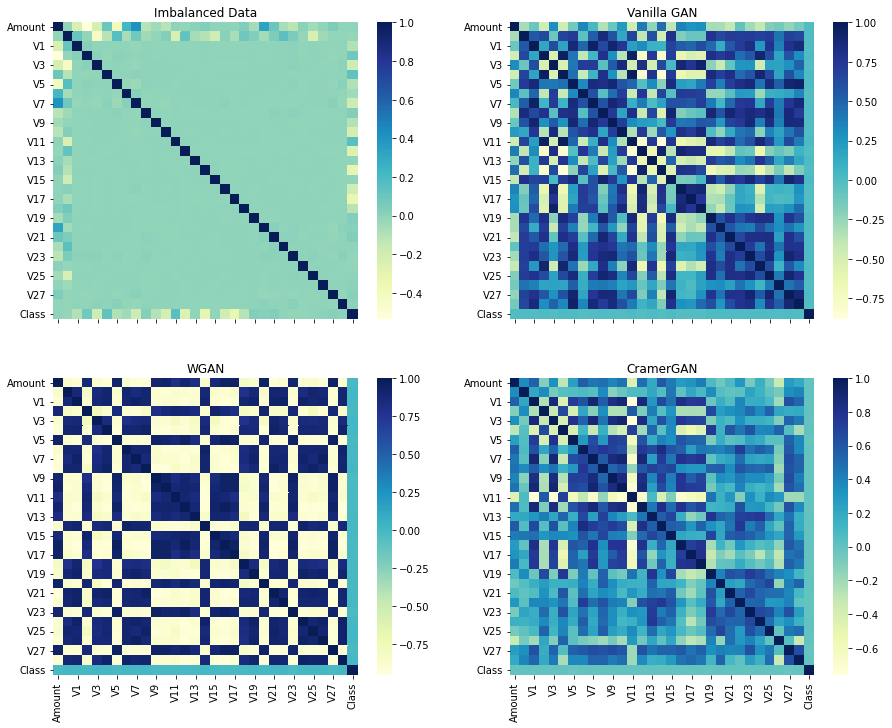

In [89]:
# Re-plotting Correlation
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,12))

#Imbalanced Data
dataplot = sb.heatmap(imbalancedf.corr(), cmap="YlGnBu", ax=axes[0,0])
axes[0,0].set_title('Imbalanced Data')

# Vanilla GAN
dataplot = sb.heatmap(gan_data.corr(), cmap="YlGnBu", ax=axes[0,1])
axes[0,1].set_title('Vanilla GAN')

# WGAN
dataplot = sb.heatmap(wgan_data.corr(), cmap="YlGnBu", ax=axes[1,0])
axes[1,0].set_title('WGAN')

# CramerGAN
dataplot = sb.heatmap(cramergan_data.corr(), cmap="YlGnBu", ax=axes[1,1])
axes[1,1].set_title('CramerGAN')

plt.show()

One can observe here that Vanilla GAN and CramerGAN was able to create a synthetic dataset with feature correlation similar to those seen in the resampling methods.

# Subset Sampling

**Adjusting Number of Samples for Analysis, splitting to input and target, converting from dataframe to NDarray** Since the amount of data is huge, a sample will be used for the remaining sections. Synthetic datasets created by RandomUnderSampling, NearMiss has approximately 700 data points for each of their training sets. For SMOTE, SVM SMOTE, Borderline SMOTE, ADASYN, RandomOverSampling, Vanilla GAN, WGAN, and CramerGAN their datasets comprise of nearly 199008x2=400000 data points (or however many was generated) each so for issues due to computational power, these datasets will be randomly compressed to contain 40,000 data points as well. For the synthetic datasets with only 700 data samples, a further comrpessed testing set with 400 samples are created to verify their performance.

In [90]:
resampling_methods = [test_data_df, smotedf, svmdf, bsmdf, adasyndf, rosdf]
nosampling_methods = [rusdf, nmdf, gan_data, wgan_data, cramergan_data]
sampled_data_input, sampled_data_target = [], []
sampled_data_labels = ["test_data_df", "smotedf", "svmdf", "bsmdf", "adasyndf", "rosdf", "rusdf", "nmdf", "gan_data", "wgan_data", "cramergan_data"]

#Split Data for sampled methods
for dataframe in resampling_methods:
  #sample
  dataframe = dataframe.sample(random_state=42, n=n_samples)
  #split input, target
  input = dataframe.drop(columns=['Class']).to_numpy()
  target = dataframe['Class'].to_numpy()
  #store in a dict
  sampled_data_input.append(input)
  sampled_data_target.append(target)

#Split Data for no sampling methods
for dataframe in nosampling_methods:
  #split input, target
  input = dataframe.drop(columns=['Class']).to_numpy()
  target = dataframe['Class'].to_numpy()
  #store in a dict
  sampled_data_input.append(input)
  sampled_data_target.append(target)

#Split Data for Smaller Test Set
#sample
test_data_df_small = test_data_df.sample(random_state=42, n=400)
#split input, target
sampled_test_input_small = test_data_df_small.drop(columns=['Class']).to_numpy()
sampled_test_target_small = test_data_df_small['Class'].to_numpy()

sampled_test_input = sampled_data_input[0]
sampled_test_target = sampled_data_target[0]


In [102]:
#Print number of fraud and non-fraud data in sampled test set
import collections
elements_count = collections.Counter(sampled_test_target)
for key, value in elements_count.items():
   print(f"{key}: {value}")

0.0: 39949
1.0: 51


# Classifiers (Evaluation Metrics)

**Evaluation Metrics** Here, evaluation metrics are defined to evaluate each classification algorithm.

In [91]:
# Metrics for normal test sets
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, recall_score, precision_score, f1_score

def plt_roc_curve(model, txt):
  prob = model.predict_proba(sampled_test_input)[:,1]
  fpr, tpr, thresholds = roc_curve(sampled_test_target, prob)
  plt.plot(fpr, tpr)
  plt.title("ROC Curve: "+txt)
  plt.xlabel('FPR: False positive rate')
  plt.ylabel('TPR: True positive rate')
  plt.show()

def plt_confusion_matrix(pred_test, txt):
  cmx_data = confusion_matrix(sampled_test_target, pred_test) 
  df_cmx = pd.DataFrame(cmx_data)
  sns.heatmap(df_cmx, fmt='d', annot=True, square=True)
  plt.title('Confusion Matrix for '+txt)  
  plt.xlabel('Predicted Category')
  plt.ylabel('True Category')
  plt.show()

def arpf_multiclass(pred_test):
  print("accuracy of test data: "+str(accuracy_score(sampled_test_target, pred_test)))
  print("recall: "+str(recall_score(sampled_test_target, pred_test, average="macro")))
  print("precision (each category):\n"+str(precision_score(sampled_test_target, pred_test, average="macro")))
  print("F-1 Score: "+str(f1_score(sampled_test_target, pred_test, average="macro")))  

# Metrics for smaller test sets
def plt_roc_curve_small(model, txt):
  prob = model.predict_proba(sampled_test_input_small)[:,1]
  fpr, tpr, thresholds = roc_curve(sampled_test_target_small, prob)
  plt.plot(fpr, tpr)
  plt.title("ROC Curve: "+txt)
  plt.xlabel('FPR: False positive rate')
  plt.ylabel('TPR: True positive rate')
  plt.show()

def plt_confusion_matrix_small(pred_test, txt):
  cmx_data = confusion_matrix(sampled_test_target_small, pred_test) 
  df_cmx = pd.DataFrame(cmx_data)
  sns.heatmap(df_cmx, fmt='d', annot=True, square=True)
  plt.title('Confusion Matrix for '+txt)  
  plt.xlabel('Predicted Category')
  plt.ylabel('True Category')
  plt.show()

def arpf_multiclass_small(pred_test):
  print("accuracy of test data: "+str(accuracy_score(sampled_test_target_small, pred_test)))
  print("recall: "+str(recall_score(sampled_test_target_small, pred_test, average="macro")))
  print("precision (each category):\n"+str(precision_score(sampled_test_target_small, pred_test, average="macro")))
  print("F-1 Score: "+str(f1_score(sampled_test_target_small, pred_test, average="macro")))  

# Classifiers (Random Forest)

**Random Forest**

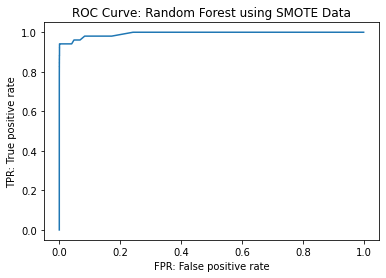

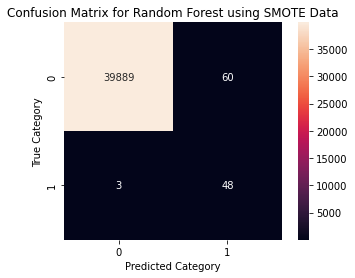

accuracy of test data: 0.998425
recall: 0.9698372778233424
precision (each category):
0.7221846206981071
F-1 Score: 0.8014922583162336


In [92]:
#Random-Forest, SMOTE
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[1], sampled_data_target[1])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

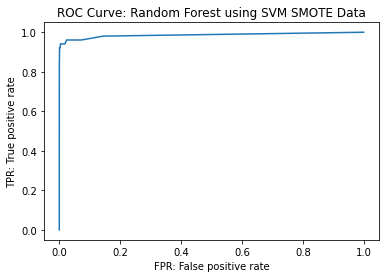

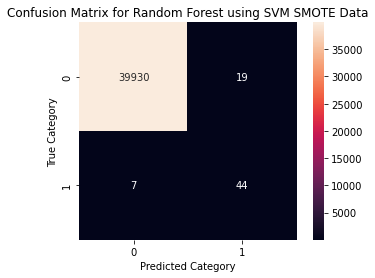

accuracy of test data: 0.99935
recall: 0.931134745820529
precision (each category):
0.8491187111764521
F-1 Score: 0.8858021803877543


In [93]:
#Random-Forest, SVM SMOTE
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[2], sampled_data_target[2])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using SVM SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using SVM SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

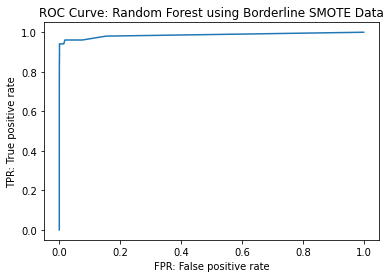

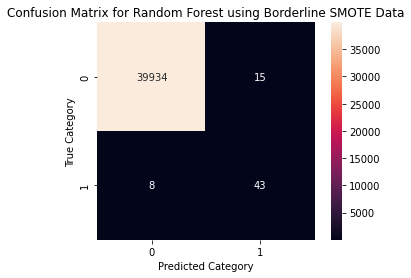

accuracy of test data: 0.999425
recall: 0.9213808880832866
precision (each category):
0.8705895099618586
F-1 Score: 0.8943514667174393


In [94]:
#Random-Forest, Borderline SMOTE
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[3], sampled_data_target[3])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using Borderline SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using Borderline SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

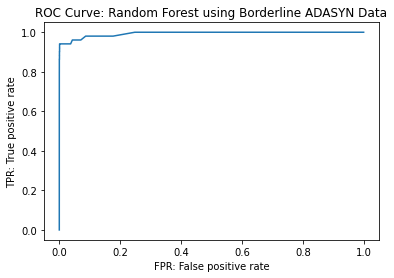

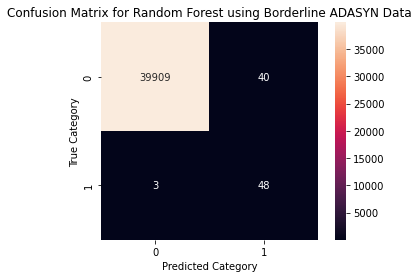

accuracy of test data: 0.998925
recall: 0.9700875969802675
precision (each category):
0.7726896900453726
F-1 Score: 0.845054523241326


In [95]:
#Random-Forest, ADASYN
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[4], sampled_data_target[4])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using Borderline ADASYN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using Borderline ADASYN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

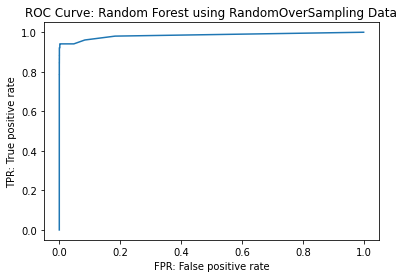

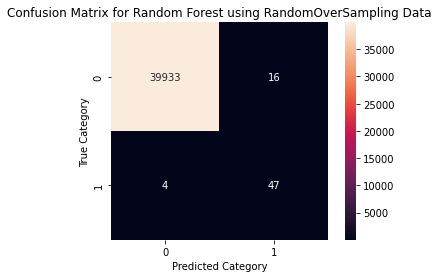

accuracy of test data: 0.9995
recall: 0.9605840583999501
precision (each category):
0.8729657941416461
F-1 Score: 0.9121555233751957


In [96]:
#Random-Forest, Random Over Sampling
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[5], sampled_data_target[5])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using RandomOverSampling Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using RandomOverSampling Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


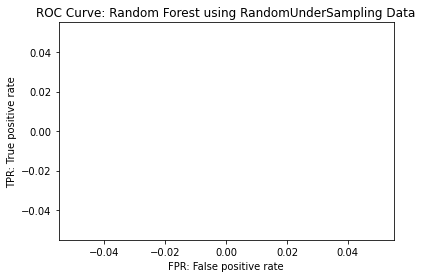

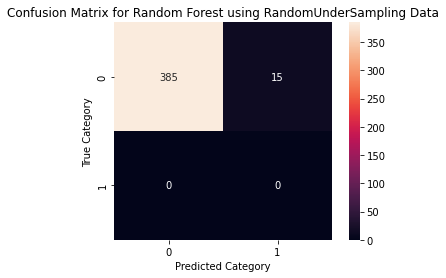

accuracy of test data: 0.9625
recall: 0.48125
precision (each category):
0.5
F-1 Score: 0.4904458598726115


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
#Random-Forest, Random Under Sampling
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[6], sampled_data_target[6])
predictions_rf = random_forest.predict(sampled_test_input_small)

#ROC curve
plt_roc_curve_small(random_forest, 'Random Forest using RandomUnderSampling Data')

#confusion matrix
plt_confusion_matrix_small(predictions_rf, 'Random Forest using RandomUnderSampling Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass_small(predictions_rf)

As evident here, under-sampling of data with a dataset like this is crude because the extremely small amount of fraudulent data in comparison to the entire dataset makes it very difficult to obtain even a single fraudulent result in the test set. Therefore, under-sampling methods (RandomUnderSampling and NearMiss) will be ignored.

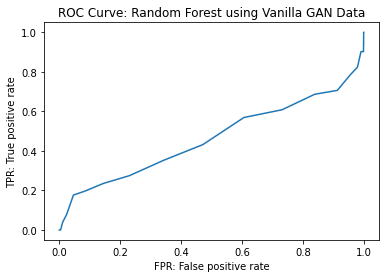

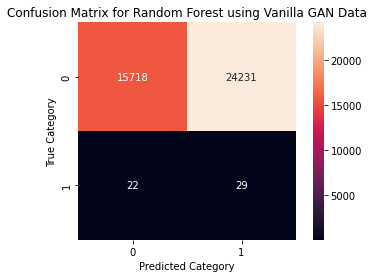

accuracy of test data: 0.393675
recall: 0.481039550917616
precision (each category):
0.49989883525676415
F-1 Score: 0.28343892065290677


In [98]:
#Random-Forest, Vanilla GAN
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[8], sampled_data_target[8])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using Vanilla GAN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using Vanilla GAN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

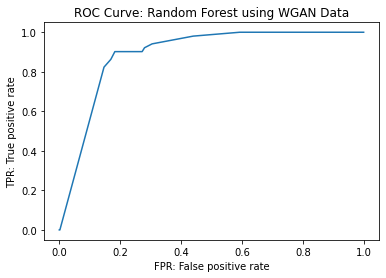

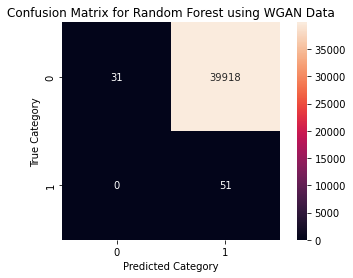

accuracy of test data: 0.00205
recall: 0.5003879946932339
precision (each category):
0.5006379944456955
F-1 Score: 0.002049750512437628


In [99]:
#Random-Forest, WGAN
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[9], sampled_data_target[9])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using WGAN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using WGAN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

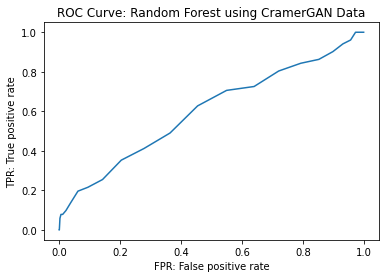

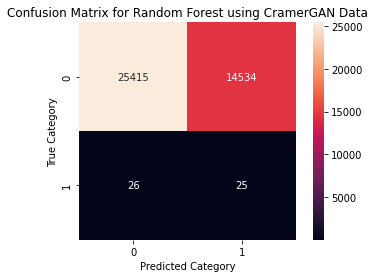

accuracy of test data: 0.636
recall: 0.563191107878231
precision (each category):
0.5003475892482382
F-1 Score: 0.3903791487896712


In [100]:
#Random-Forest, Cramer GAN
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_data_input[10], sampled_data_target[10])
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using CramerGAN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using CramerGAN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

As seen in above, WGAN predictions are terrible (as can be noticed from the correlation matrix previously.) Both Vanilla GAN and CramerGAN has a lot of false positives. The synthetic data models with the highest recall scores were: SMOTE, ADASYN, and RandomOverSampling.

**Hyperparameter Tuning**

Since ADASYN had the highest recall score for RF (Random Forest,) further experimentation will be conducted by haperparameter tuning using GridSearchCV. Tuning is done by scoring negative RMSE.

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_rfr = {"max_depth": [2,4,8],
            "n_estimators":[10,50,100],
            "max_features": [0.25, 0.5, 0.75],}

random_forest = RandomForestClassifier()
clf = GridSearchCV(estimator=random_forest, param_grid=param_rfr, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
clf.fit(sampled_data_input[4], sampled_data_target[4])

print("Best Parameters: "+str(clf.best_params_))
random_forest = RandomForestClassifier(max_depth=clf.best_params_['max_depth'], n_estimators=clf.best_params_['n_estimators'], max_features=clf.best_params_['max_features']).fit(sampled_data_input[4], sampled_data_target[4])
err = mean_squared_error(random_forest.predict(sampled_test_input), sampled_test_target)
print('rmse for Random Forest Classifier={}'.format(err**0.5))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 8, 'max_features': 0.75, 'n_estimators': 50}
rmse for Random Forest Classifier=0.0804673846971554


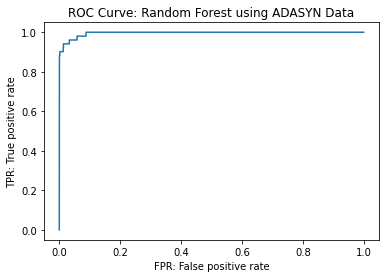

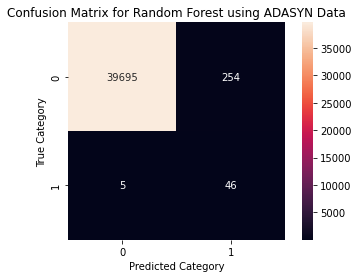

accuracy of test data: 0.993525
recall: 0.9478013388639143
precision (each category):
0.5766036943744752
F-1 Score: 0.6294282474899935


In [117]:
predictions_rf = random_forest.predict(sampled_test_input)

#ROC curve
plt_roc_curve(random_forest, 'Random Forest using ADASYN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'Random Forest using ADASYN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

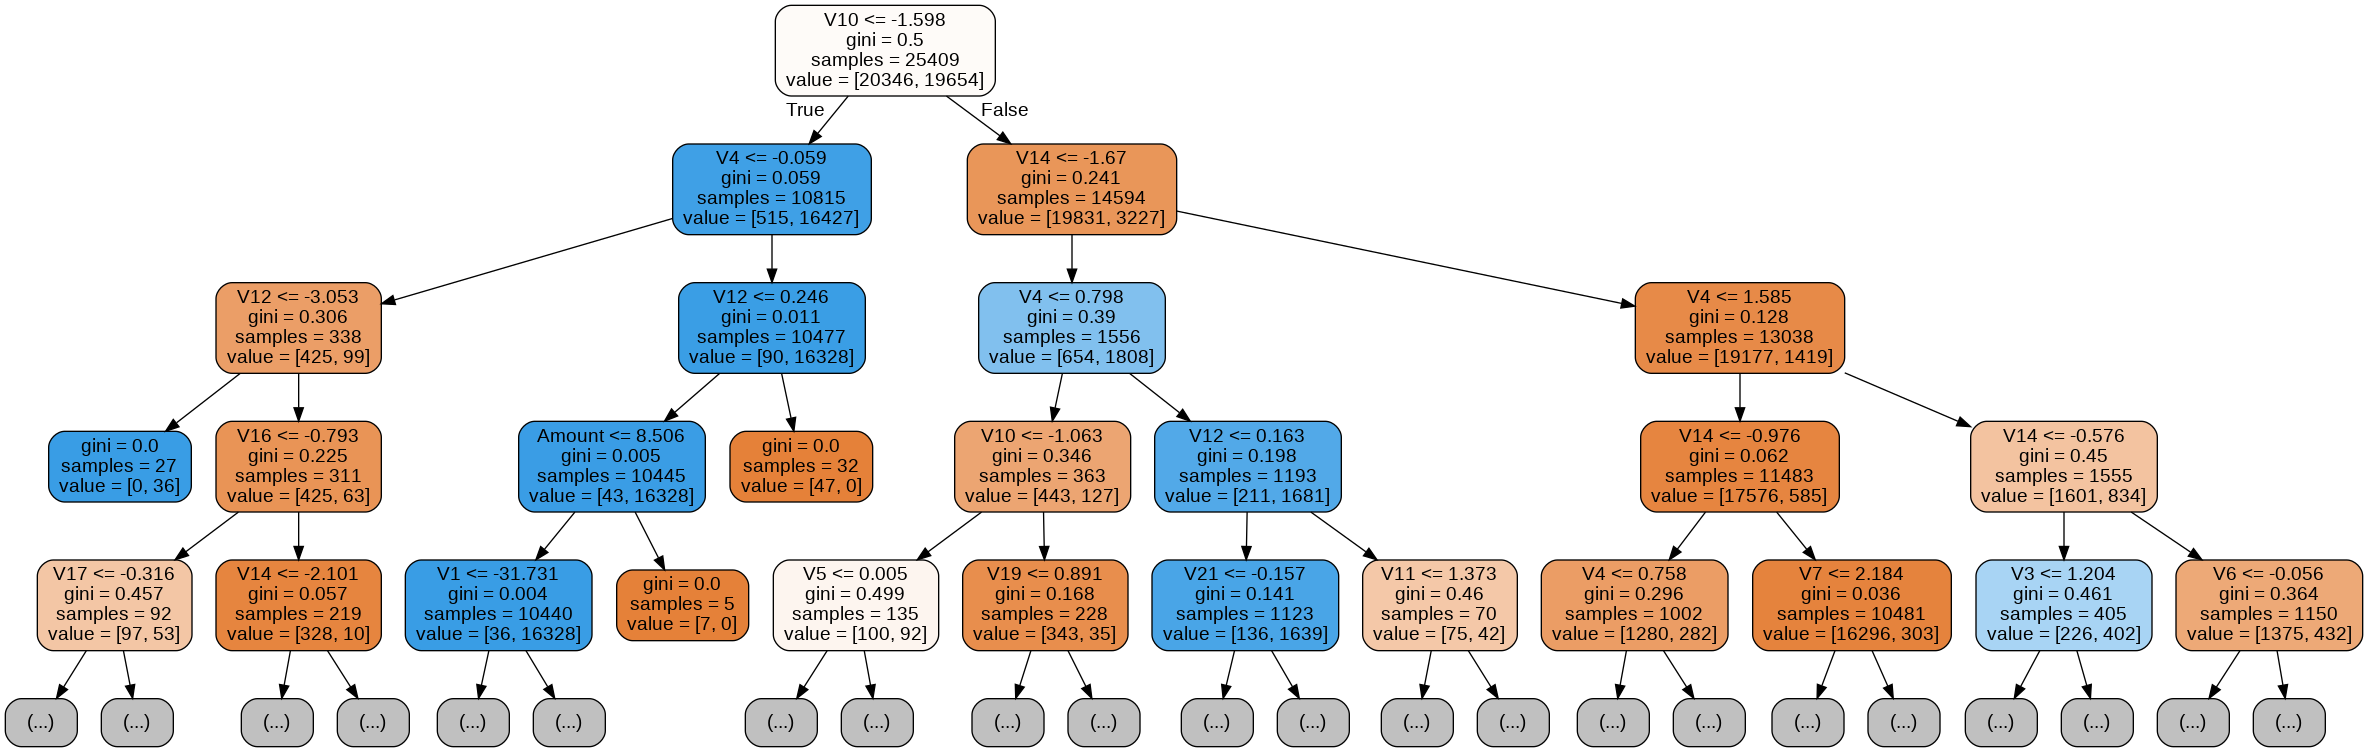

In [106]:
from sklearn.tree import export_graphviz

estimator = random_forest.estimators_[0]
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = column_values,
                rounded = True, proportion = False, 
                max_depth = 4,
                filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')

For the RF classifier on ADASYN data until depth=4, the above tree was drawn. At the root node, V10 is selected as the branching feature. Furthermore, V4, V12, and V14 seem to be often used as the branching features, indicating their saliency.

# Classifiers (LightGBM)

In [ ]:
# !pip install lightgbm

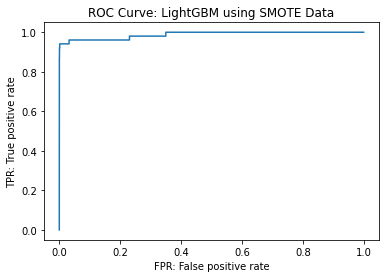

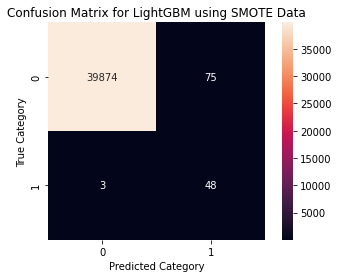

accuracy of test data: 0.99805
recall: 0.9696495384556486
precision (each category):
0.6950843355513325
F-1 Score: 0.7753735063418106


In [119]:
#LightGBM, SMOTE
lgbm = lgb.LGBMClassifier()
lgbm.fit(sampled_data_input[1], sampled_data_target[1])
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

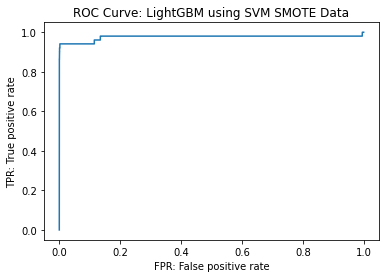

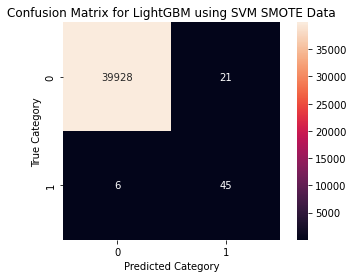

accuracy of test data: 0.999325
recall: 0.940913635473464
precision (each category):
0.8408339669545659
F-1 Score: 0.8844463874570405


In [120]:
#LightGBM, SVM SMOTE
lgbm = lgb.LGBMClassifier()
lgbm.fit(sampled_data_input[2], sampled_data_target[2])
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using SVM SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using SVM SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

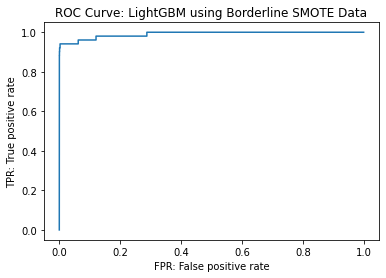

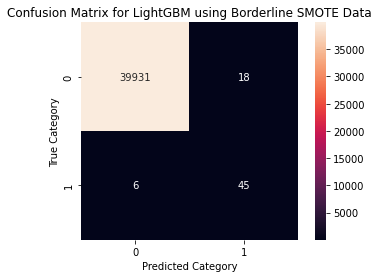

accuracy of test data: 0.9994
recall: 0.9409511833470028
precision (each category):
0.8570677388315168
F-1 Score: 0.8945866280502347


In [121]:
#LightGBM, Borderline SMOTE
lgbm = lgb.LGBMClassifier()
lgbm.fit(sampled_data_input[3], sampled_data_target[3])
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using Borderline SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using Borderline SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

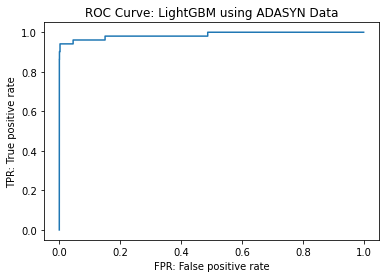

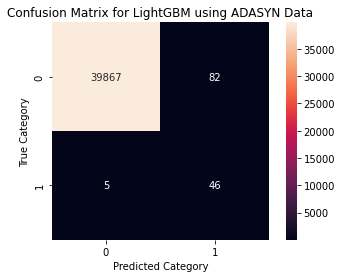

accuracy of test data: 0.997825
recall: 0.9499540836134699
precision (each category):
0.6796247993579454
F-1 Score: 0.7564382708545007


In [116]:
#LightGBM, ADASYN
lgbm = lgb.LGBMClassifier()
lgbm.fit(sampled_data_input[4], sampled_data_target[4])
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using ADASYN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using ADASYN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

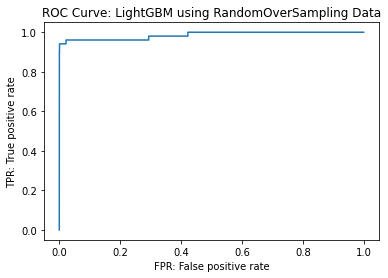

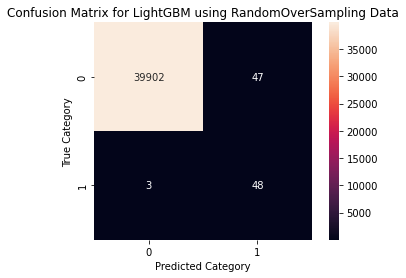

accuracy of test data: 0.99875
recall: 0.9699999852753437
precision (each category):
0.7525939896728414
F-1 Score: 0.8284540519324479


In [122]:
#LightGBM, RandomOverSampling
lgbm = lgb.LGBMClassifier()
lgbm.fit(sampled_data_input[5], sampled_data_target[5])
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using RandomOverSampling Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using RandomOverSampling Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

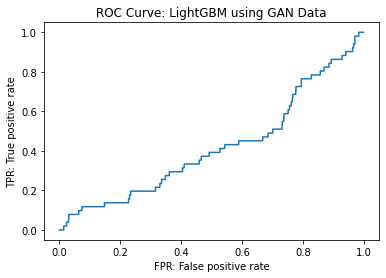

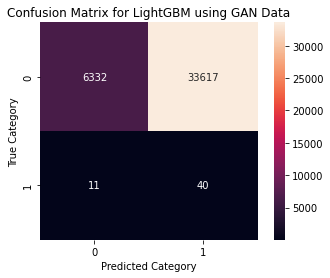

accuracy of test data: 0.1593
recall: 0.4714079078275782
precision (each category):
0.49972713243855105
F-1 Score: 0.13797055546534


In [123]:
#LightGBM, GAN
lgbm = lgb.LGBMClassifier()
lgbm.fit(sampled_data_input[8], sampled_data_target[8])
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using GAN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using GAN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

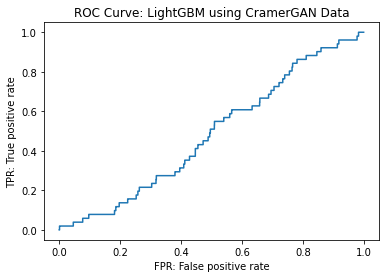

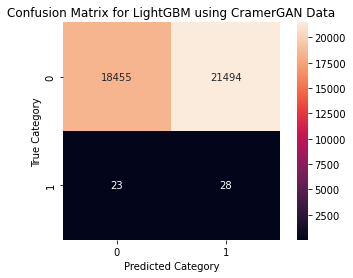

accuracy of test data: 0.462075
recall: 0.5054918059741857
precision (each category):
0.5000281354382312
F-1 Score: 0.317162159542218


In [125]:
#LightGBM, CramerGAN
lgbm = lgb.LGBMClassifier()
lgbm.fit(sampled_data_input[10], sampled_data_target[10])
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using CramerGAN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using CramerGAN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

Using LightGBM, the datasets with the best recall scores were SMOTE and RandomOverSampling. It is once again observed that the synthetic sets created using GANs indicate poor performance.

In [128]:
#LightGBM on SMOTE Data
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
param_lgbm = {
    'max_depth': [2,4,8],
    'num_leaves': [2,4,8],
    "n_estimators":[10,50,100],
}

clf = GridSearchCV(estimator=lgbm, param_grid=param_lgbm, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3, refit=True)
clf.fit(sampled_data_input[1], sampled_data_target[1])

print("Best Parameters: "+str(clf.best_params_))
lgbm = lgb.LGBMClassifier(max_depth=clf.best_params_['max_depth'], num_leaves=clf.best_params_['num_leaves'], n_estimators=clf.best_params_['n_estimators']).fit(sampled_data_input[1], sampled_data_target[1])
err = mean_squared_error(lgbm.predict(sampled_test_input), sampled_test_target)
print('rmse for LightGBM Regressor={}'.format(err**0.5))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 8, 'n_estimators': 100, 'num_leaves': 8}
rmse for LightGBM Regressor=0.07416198487095663


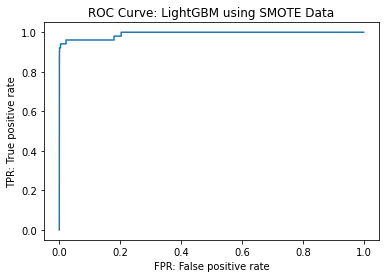

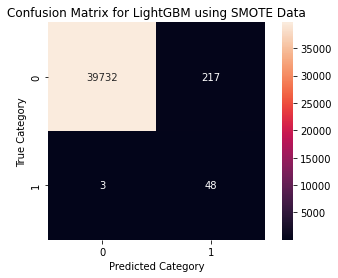

accuracy of test data: 0.9945
recall: 0.9678722724414806
precision (each category):
0.5905282876414738
F-1 Score: 0.6505182813887006


In [129]:
predictions_rf = lgbm.predict(sampled_test_input)

#ROC curve
plt_roc_curve(lgbm, 'LightGBM using SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'LightGBM using SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

# Classifiers (Naive Bayes)

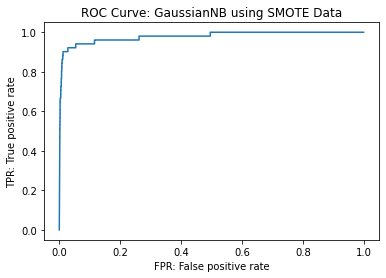

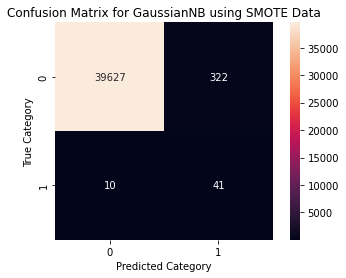

accuracy of test data: 0.9917
recall: 0.8979306458872317
precision (each category):
0.556347684437371
F-1 Score: 0.5969480224412542


In [132]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(sampled_data_input[1], sampled_data_target[1])
predictions_rf = gnb.predict(sampled_test_input)

#ROC curve
plt_roc_curve(gnb, 'GaussianNB using SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'GaussianNB using SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

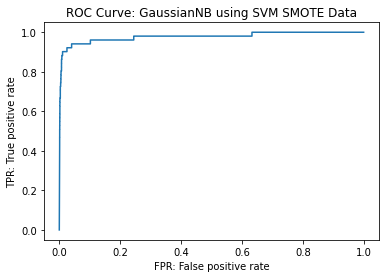

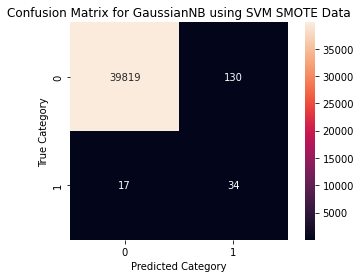

accuracy of test data: 0.996325
recall: 0.8317062588133203
precision (each category):
0.6034451617485349
F-1 Score: 0.6572183090893987


In [133]:
#GaussianNB, SVM SMOTE
gnb = GaussianNB()
gnb.fit(sampled_data_input[2], sampled_data_target[2])
predictions_rf = gnb.predict(sampled_test_input)

#ROC curve
plt_roc_curve(gnb, 'GaussianNB using SVM SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'GaussianNB using SVM SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

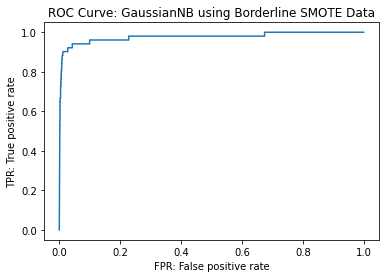

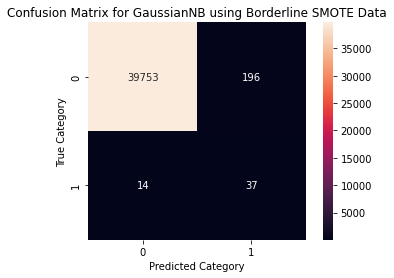

accuracy of test data: 0.99475
recall: 0.8602919703013499
precision (each category):
0.5792231162832513
F-1 Score: 0.6289645141661349


In [134]:
#GaussianNB, Borderline SMOTE
gnb = GaussianNB()
gnb.fit(sampled_data_input[3], sampled_data_target[3])
predictions_rf = gnb.predict(sampled_test_input)

#ROC curve
plt_roc_curve(gnb, 'GaussianNB using Borderline SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'GaussianNB using Borderline SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

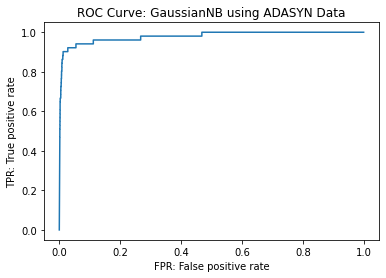

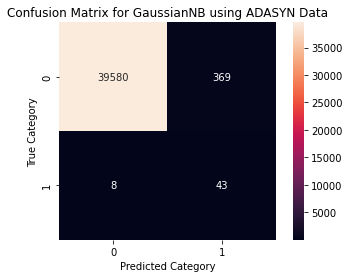

accuracy of test data: 0.990575
recall: 0.9169502390057127
precision (each category):
0.5520834253000075
F-1 Score: 0.590502604015122


In [135]:
#GaussianNB, ADASYN
gnb = GaussianNB()
gnb.fit(sampled_data_input[4], sampled_data_target[4])
predictions_rf = gnb.predict(sampled_test_input)

#ROC curve
plt_roc_curve(gnb, 'GaussianNB using ADASYN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'GaussianNB using ADASYN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

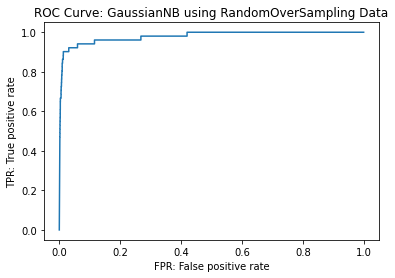

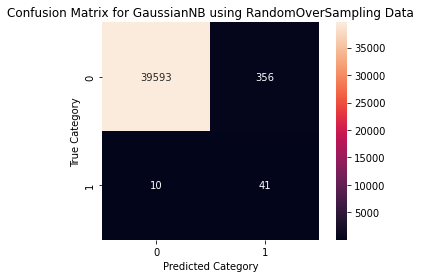

accuracy of test data: 0.99085
recall: 0.8975051033204591
precision (each category):
0.5515110265353406
F-1 Score: 0.5892174750028731


In [136]:
#GaussianNB, RandomOverSampling
gnb = GaussianNB()
gnb.fit(sampled_data_input[5], sampled_data_target[5])
predictions_rf = gnb.predict(sampled_test_input)

#ROC curve
plt_roc_curve(gnb, 'GaussianNB using RandomOverSampling Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'GaussianNB using RandomOverSampling Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

Overall, ADASYN performed the best with GaussianNB. However, the performance is degraded compared to that of the previous classifiers.

# Classifiers (Decision Tree)

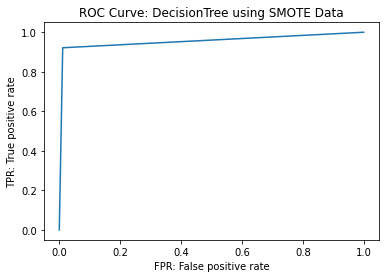

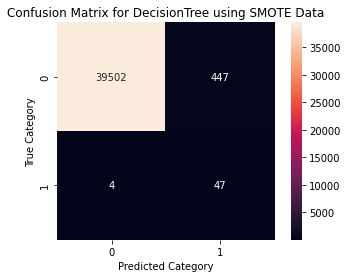

accuracy of test data: 0.988725
recall: 0.9551896805682146
precision (each category):
0.5475202249809438
F-1 Score: 0.583400447659774


In [137]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(sampled_data_input[1], sampled_data_target[1])
predictions_rf = dt.predict(sampled_test_input)

#ROC curve
plt_roc_curve(dt, 'DecisionTree using SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'DecisionTree using SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

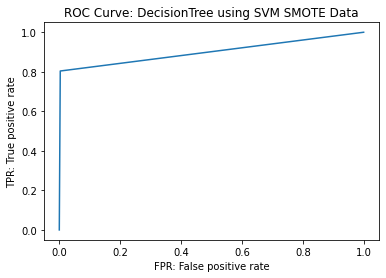

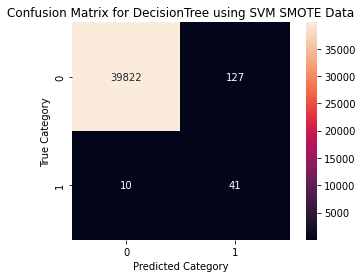

accuracy of test data: 0.996575
recall: 0.9003712576672512
precision (each category):
0.6218982823095095
F-1 Score: 0.6863560114535001


In [138]:
dt = tree.DecisionTreeClassifier()
dt.fit(sampled_data_input[2], sampled_data_target[2])
predictions_rf = dt.predict(sampled_test_input)

#ROC curve
plt_roc_curve(dt, 'DecisionTree using SVM SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'DecisionTree using SVM SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

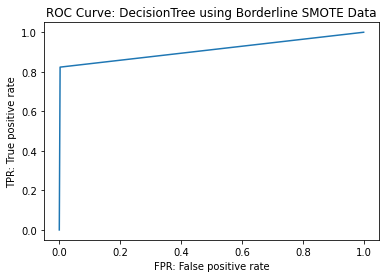

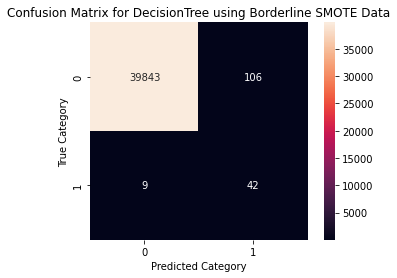

accuracy of test data: 0.997125
recall: 0.9104380143506501
precision (each category):
0.6417789740960473
F-1 Score: 0.7103347340328161


In [140]:
dt = tree.DecisionTreeClassifier()
dt.fit(sampled_data_input[3], sampled_data_target[3])
predictions_rf = dt.predict(sampled_test_input)

#ROC curve
plt_roc_curve(dt, 'DecisionTree using Borderline SMOTE Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'DecisionTree using Borderline SMOTE Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

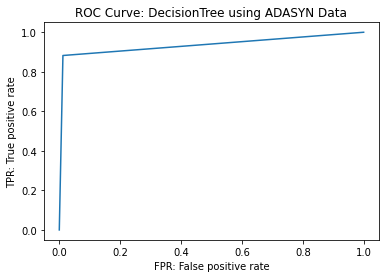

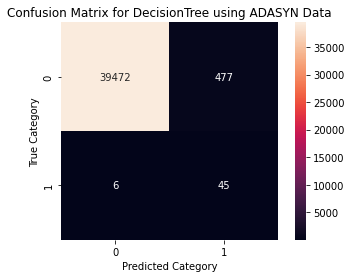

accuracy of test data: 0.987925
recall: 0.9352063586955721
precision (each category):
0.543027456584287
F-1 Score: 0.5754935036333867


In [141]:
dt = tree.DecisionTreeClassifier()
dt.fit(sampled_data_input[4], sampled_data_target[4])
predictions_rf = dt.predict(sampled_test_input)

#ROC curve
plt_roc_curve(dt, 'DecisionTree using ADASYN Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'DecisionTree using ADASYN Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)

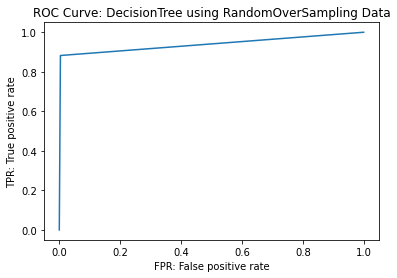

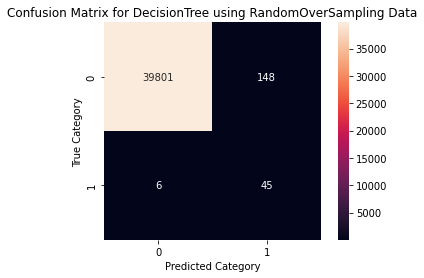

accuracy of test data: 0.99615
recall: 0.9393241088269897
precision (each category):
0.6165049472513167
F-1 Score: 0.6834607849021482


In [142]:
dt = tree.DecisionTreeClassifier()
dt.fit(sampled_data_input[5], sampled_data_target[5])
predictions_rf = dt.predict(sampled_test_input)

#ROC curve
plt_roc_curve(dt, 'DecisionTree using RandomOverSampling Data')

#confusion matrix
plt_confusion_matrix(predictions_rf, 'DecisionTree using RandomOverSampling Data')

#accuracy, recall, precision, F-1 Score
arpf_multiclass(predictions_rf)